# Text Mining  pipeline

### let's import a few free-open source tools to our convenience 

In [2]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

### Read in & clean text

In [3]:
import pandas as pd
data = pd.read_json("stupidstuff.json")
data[0:10]

,body,category,id,rating
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63
1,"At a dinner party, several of the guests were...",Blonde Jokes,2,2.57
2,One day this cop pulls over a blonde for spee...,Blonde Jokes,3,3.09
3,Three women are about to be executed for crim...,Blonde Jokes,4,4.10
4,A girl came skipping home FROM school one day...,Blonde Jokes,5,4.30
5,An airline captain was helping a new blonde f...,Military,6,3.23
6,A blonde and a brunette decided to rob a bank...,Blonde Jokes,7,4.00
7,"A brunette, a redhead and a blonde walk into ...",Blonde Jokes,8,2.33
8,A blonde suspects her boyfriend of cheating o...,Blonde Jokes,9,3.77
9,One day a blonde comes out of the tanning sal...,Blonde Jokes,10,3.64


### Feature eng.

In [4]:
def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    return text

data['text_no_punc_lower'] = data['body'].apply(lambda x: clean_text(x))

In [5]:
data.head()

,body,category,id,rating,text_no_punc_lower
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,a blackjack dealer and a player with a thirtee...
1,"At a dinner party, several of the guests were...",Blonde Jokes,2,2.57,at a dinner party several of the guests were ...
2,One day this cop pulls over a blonde for spee...,Blonde Jokes,3,3.09,one day this cop pulls over a blonde for spee...
3,Three women are about to be executed for crim...,Blonde Jokes,4,4.10,three women are about to be executed for crim...
4,A girl came skipping home FROM school one day...,Blonde Jokes,5,4.30,a girl came skipping home from school one day...


In [10]:
def stopwords_cleaner(text):
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['text_no_punc_lower'] = data['text_no_punc_lower'].apply(stopwords_cleaner)
data.head()

,body,category,id,rating,text_no_punc_lower
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,"[blackjack, dealer, player, thirteen, count, h..."
1,"At a dinner party, several of the guests were...",Blonde Jokes,2,2.57,"[, dinner, party, several, guests, arguing, wh..."
2,One day this cop pulls over a blonde for spee...,Blonde Jokes,3,3.09,"[, one, day, cop, pulls, blonde, speeding, cop..."
3,Three women are about to be executed for crim...,Blonde Jokes,4,4.10,"[, three, women, executed, crimes, ones, brune..."
4,A girl came skipping home FROM school one day...,Blonde Jokes,5,4.30,"[, girl, came, skipping, home, school, one, da..."


In [11]:
def words_counter(text):
    return len(text.split())

data['words_count'] = data['body'].apply(words_counter)
data.head()

,body,category,id,rating,text_no_punc_lower,words_count
0,A blackjack dealer and a player with a thirtee...,Children,1,2.63,"[blackjack, dealer, player, thirteen, count, h...",102
1,"At a dinner party, several of the guests were...",Blonde Jokes,2,2.57,"[, dinner, party, several, guests, arguing, wh...",80
2,One day this cop pulls over a blonde for spee...,Blonde Jokes,3,3.09,"[, one, day, cop, pulls, blonde, speeding, cop...",47
3,Three women are about to be executed for crim...,Blonde Jokes,4,4.10,"[, three, women, executed, crimes, ones, brune...",162
4,A girl came skipping home FROM school one day...,Blonde Jokes,5,4.30,"[, girl, came, skipping, home, school, one, da...",185


In [21]:
from matplotlib import pyplot as pp
import numpy as np
%matplotlib inline

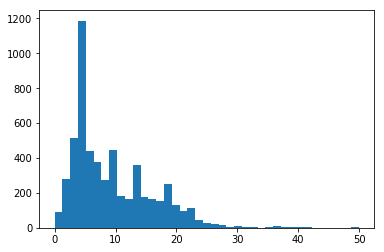

In [22]:
bins = np.linspace(0,50,40) #y amount of samples, x len of each
pp.hist(data['body_len'], bins)
pp.show()

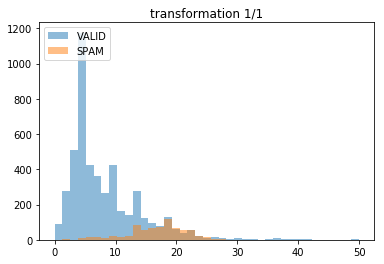

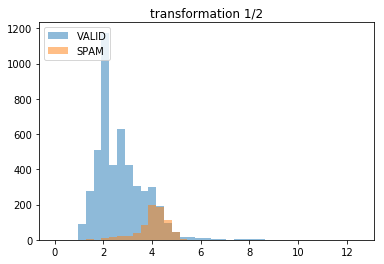

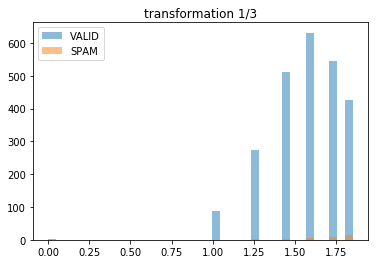

In [24]:
for i in [1,2,3]:
    bins = np.linspace(0,50/(i**i),40)
    pp.hist((data[data['label'] == 'Valid']['body_len'])**(1/i), bins, label = 'VALID', alpha = 0.5)
    pp.hist((data[data['label'] == 'Spam']['body_len'])**(1/i), bins, label = 'SPAM', alpha = 0.5)
    pp.legend(loc='upper left')
    pp.title('transformation 1/{}'.format(str(i)))
    pp.show()

In [25]:
data.head()

,label,body_text,body_len
0,Spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
1,Valid,"[nah, dont, think, goes, usf, lives, around, t...",8
2,Valid,"[even, brother, like, speak, treat, like, aids...",8
3,Valid,"[date, sunday]",2
4,Valid,"[per, request, melle, melle, oru, minnaminungi...",16


In [32]:
def trf_text(text):
    text = [ps.stem(word) for word in text if word not in stopwords]
    return text

tfidf_vect = CountVectorizer(analyzer=trf_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,0,1,2,3,4,5,6,7,8,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML TIME!

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [39]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3)))

In [40]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.124
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.545
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.717
Est: 10 / Depth: None ---- Precision: 0.976 / Recall: 0.841
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.186
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.51
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.697
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.821
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.186
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.559
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.703
Est: 100 / Depth: None ---- Precision: 0.983 / Recall: 0.821


Precision: 1.0 all tagged as 'Spam' is actually 'Spam'
Recall: out of the 'Spam' we had, how many we found!

Higher is better :)